In [3]:
import numpy as np
from matplotlib import pyplot as plt


In [46]:
a = 2.5
omega = .1
phi = np.pi/2

data = np.zeros(1000)
for i in range(0,1000):
    data[i]= a*np.sin(omega*i+phi)+ np.random.normal(0,.1)

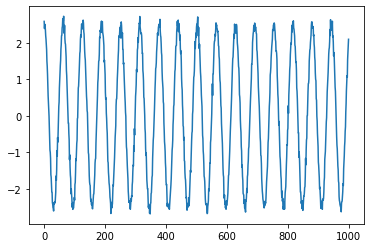

In [48]:
plt.plot(data[:])
plt.show()

In [29]:
def loglikely(am,om,ph):
    N = len(data)
    const = (N/2)*np.log(2*np.pi)
    ret = 0
    for i in range(0,N):
        ret += .5*((data[i]-(am*np.sin(om*i+ph)))**2)
    return -(N/2)*np.log(2*np.pi)-ret

    

In [30]:
print(loglikely(0,0,0))
print(loglikely(-a,-omega,-phi))
print(loglikely(a,omega,phi))

-2475.03928999207
-918.9385332046727
-918.9385332046727


In [41]:
#Implement a sigma value for a 4th parameter
def threeParamMCMC(N):
    mcA = [0]
    mcO = [0]
    mcP = [0]
    accept = 0
    
    for i in range(0,N):
        newA = mcA[i] + np.random.normal(0,1)
        newO = mcO[i] + np.random.normal(0,.01)
        newP = mcA[i] + np.random.normal(0,.01)
        
        oldLike = loglikely(mcA[i],mcO[i],mcP[i])
        newLike = loglikely(newA,newO,newP)
        
        logH = newLike-oldLike
        
        if logH > 0:
            accept+=1
            mcA.append(newA)
            mcO.append(newO)
            mcP.append(newP)
            
        elif logH >= np.log(np.random.random()):
            accept+=1
            mcA.append(newA)
            mcO.append(newO)
            mcP.append(newP)
            
        else:
            mcA.append(mcA[i])
            mcO.append(mcO[i])
            mcP.append(mcP[i])
    
    return mcA, mcO, mcP, (accept/N)*100
    

In [44]:
aChain, oChain, pChain, acceptance = threeParamMCMC(N=1000)
print(acceptance)

3.9


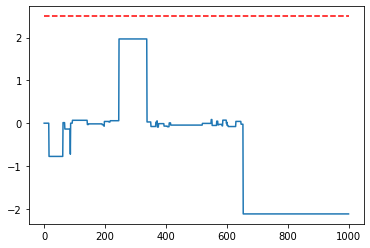

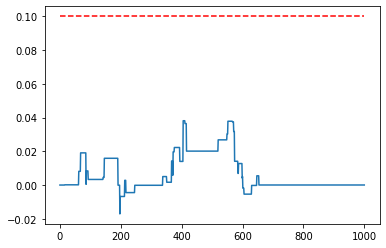

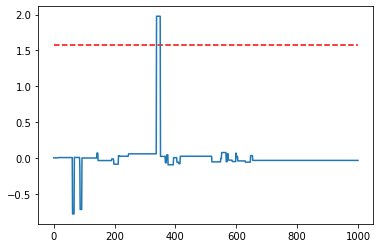

In [45]:
plt.plot(aChain)
plt.hlines(a,0,1000,colors='r',linestyles='dashed')
plt.show()
plt.plot(oChain)
plt.hlines(omega,0,1000,colors='r',linestyles='dashed')
plt.show()
plt.plot(pChain)
plt.hlines(phi,0,1000,colors='r',linestyles='dashed')
plt.show()
